Theory Questions:

Q1:

To evaluate how well our model performs at T1D classification, we need to have evaluation
metrics that measures of its performances/accuracy. Which evaluation metric is more
important to us: model accuracy or model performance? Give a simple example that
illustrates your claim.

Q1.Answer:

Even though the most known evaluation metric of a model is its accuracy, this metric is not
always a good one. For example, lets say there is a very rare disease that affects
only 1 person in 1,000,000. If we have a simple estimator that always says the
sample patient is healthy, we could very well have 100% accuracy, but the model will not be
useful at all. This is why accuracy is not always the best metric to use. There are many other
evaluation metrics we use to score the performance of the model, which include (but are not
limited to) sensitivity, specificity, PPV, NPV, F1 Score, and AUROC.

Q2:

T1D is often associated with other comorbidities such as a heart attack. You are asked to
design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant
patient features for the algorithm may include blood pressure (BP), body-mass index (BMI),
age (A), level of physical activity (P), and income (I). You should choose between two
classifiers: the first uses only BP and BMI features and the other one uses all of the features
available to you. Explain the pros and cons of each choice.

Q2.Answer:

There are a couple of things to look at when choosing whether to use feature selection:

- Computational Complexity:
The more features we have, the longer it takes to fit the models to the data. Therefore, if we
want to reduce the computation time, we can reduce the number of features.

- Noise:
Sometimes, there are features which do not correlate at all with the data. For example, if we
want to create a model that diagnoses T1D, a feature of 'Favorite Ice Cream Flavor' will probably
not help us at all, and will only introduce noise into the classifier. In this example, I'm not
sure that 'Income' is a feature that will correlate at all with T1D, and therefore removing it
might make the model better (although we should check with/without and see the test results).

- Redundancy:
Sometimes, two features that are basically derivatives of one another can be redundant, and one
of them can be removed in order to reduce computation time.

For this question, we would use the model that includes all of the features, because the
difference between 2 and 4 features isn't a lot, and the addition of 2 additional features
would not hinder the computational ability.

Q3:

A histologist wants to use machine learning to tell the difference between pancreas biopsies
that show signs of T1D and those that do not. She has already come up with dozens of
measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which
model to use. The biopsies are really similar, and it is difficult to distinguish them from the
human eye, or by just looking at the features. Which of the following is better: logistic
regression, linear SVM or nonlinear SVM? Explain your answer.

Q3.Answer

It's safe to assume that many of the images of the biopsies have areas that are
identical (meaning the pixels in that area are of the same gray level as the same ones in
other images). This means that the data is probably not linearly separable. When using
logistic regression or SVM with a linear kernel, we assume that the data is linearly seperable.
Since this is not the case here, we would choose to use an SVM model that uses a non-linear
kernel (such as RBF or poly).
It is important to note that if we want the non-linear SVM to work, we should have a number
of sample images that is greater than the number of features. If this is not the case, it
is possible that the non-linear SVM won't work as well as it should.

Q4:

What are the differences between LR and linear SVM and what is the difference in the
effect/concept of their hyper-parameters tuning?

Q4.Answer:

-General:
SVM is a model used for both classification and regression (though classification is its
main use). Basically, it creates a decision boundary, and uses the kernel trick to find the
best decision boundary to separate the data into classes.
Logistic Regression is a model used for classification. Basically, it predicts the odds
of an event happening, and uses the sigmoid function to find the relationships between
variables.

-Hyper-parameters:
The main hyper-parameter for SVM is the kernel, which maps the observations into a feature space.
In addition there is C (or 1/lambda) which is the cost parameter.
The main hyper-parameters for logistic regression are C (cost parameter) and l2/l1 (penalty).
In addition there is also 'Solver', which is the algorithm it uses in the optimization problem.

Coding Assignment:

Note:

All functions created by us are found in the following .py files:

Clean_Data.py
Visualize_Data.py
Models.py
Dimension_Reduction.py

Importing

In [1]:
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter('ignore')
from Models import model_logreg, model_lin_svm, model_nonlin_svm, model_DT,\
    model_KNN, model_LDA, model_RFC,\
    Model_Comparison_Table, RFC_Feature_Selection
from Dimension_Reduction import plot_PCA_2D
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from Clean_Data import impute
from Visualize_Data import corr_mat, countplots, test_train_dist_check, scplot

### Part 1

For pre-processing, we decided to go change all binary string classications (such as
'Yes' and 'No') to 1 and 0.
In addition, we found nans in the data, and we filled them using an iterative imputer that
takes into account the 2 nearest features (by correlation) when filling th nan with 1 or 0.
Both of these steps take place in the function 'impute'.

In [2]:
# Imputation + make everything 1 and 0 (other than 'Age')
df = pd.read_csv(r'C:\Users\dekel\Desktop\Semester 7\Machine Learning in Healthcare\hw2-Dekel-Nathan\HW2_data.csv')
df = impute(df)

### Part 2

In [3]:
# Train-Test Split
X = df.drop('Diagnosis', axis=1)
y = df.loc[:, 'Diagnosis']
x_train, X_Test, Y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10, stratify=y)

### Part 3

a.

I.
We'll create a table that checks if the distribution of the train set and the test set
are similar. If they are not, then we will be over-fitting.

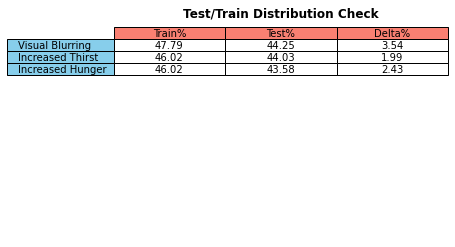

In [4]:
# Table to check for similar distribution between test & train sets
test_train_dist_check(X_Test, x_train,
                      'Visual Blurring', 'Increased Thirst', 'Increased Hunger')

As we can see, the distributions are similar, and we don't need to worry about over-fitting
in this particular situation.

II. If they were not similar, we would probably have to change the split percentage
to a higher number (maybe 30% or 40%).

We plot a correlation matrix in order to see the correlation between all of the features.

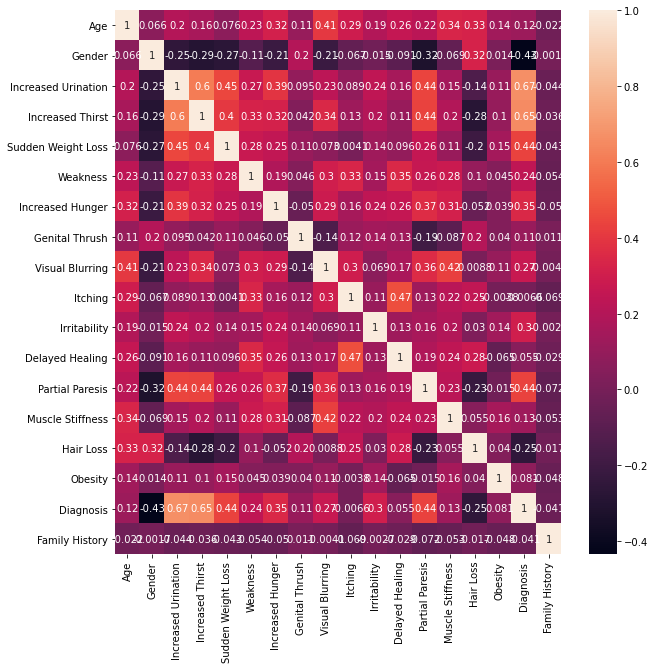

In [5]:
# Correlation Matrix
corr_mat(df)

We can see that the features that are positively correlated are:
Diagnosis & (Increased Urination, Increased Thirst, Sudden Weight Loss, and Partial Paresis) 
Increased Thirst & Increased Urination
Itching & Delayed Healing

The features that are negatively correlated are:
Diagnosis & Gender (being male).

Now, we'll plot count plots between these highly correlated features so we can see things
more clearly.

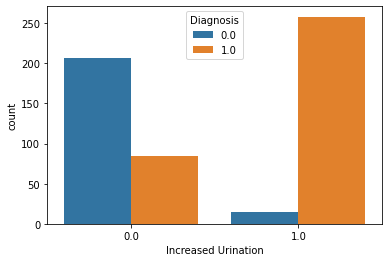

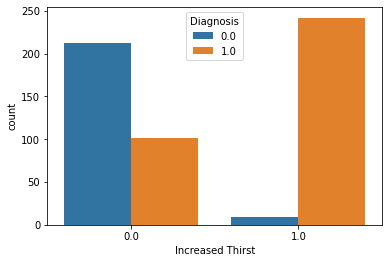

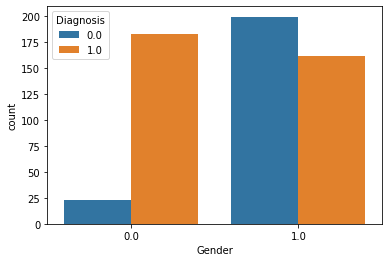

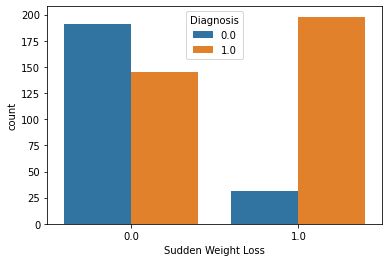

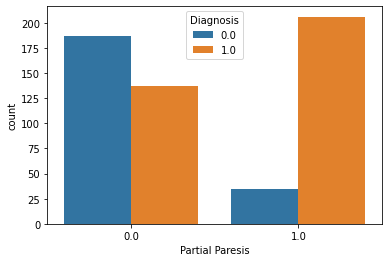

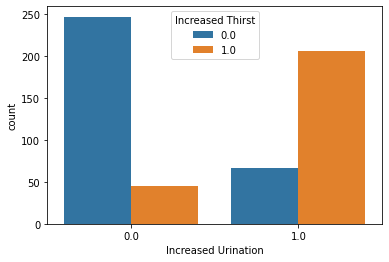

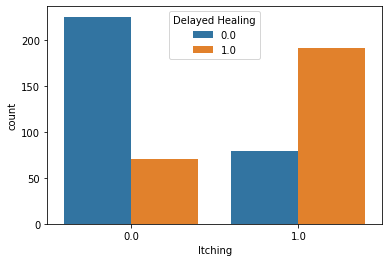

In [6]:
# Count Plots between correlated (positively or negatively) features
countplots(df, 'Increased Urination', 'Diagnosis')
countplots(df, 'Increased Thirst', 'Diagnosis')
countplots(df, 'Gender', 'Diagnosis')
countplots(df, 'Sudden Weight Loss', 'Diagnosis')
countplots(df, 'Partial Paresis', 'Diagnosis')
countplots(df, 'Increased Urination', 'Increased Thirst')
countplots(df, 'Itching', 'Delayed Healing')

Now we see that the count plots affirm our findings in the correlation matrix.

In order to check if 'Age' has an affect on the diagnosis (or its 2 most correlated features),
we'll create a scatter plot between the two.

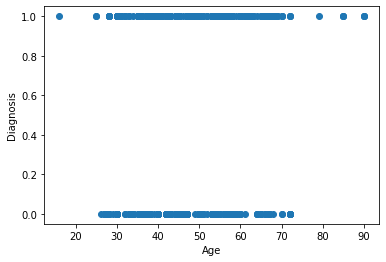

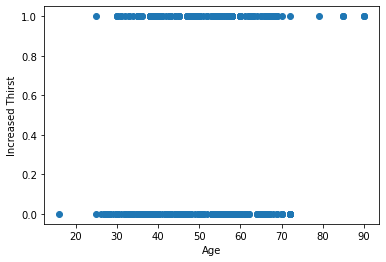

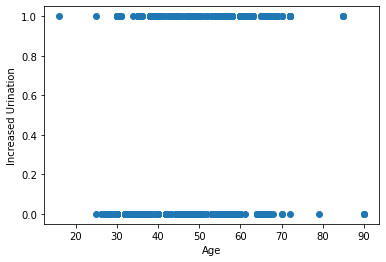

In [7]:
# Scatter Plots
scplot(df, 'Age', 'Diagnosis')
scplot(df, 'Age', 'Increased Thirst')
scplot(df, 'Age', 'Increased Urination')

We can clearly see from the scatter plots that the age is pretty evenly distributed amongst
the features, and therefore is not particularly effective in identifying the diagnosis.

d.

I.
We think that 'Age' having no serious correlation with the diagnosis was surprising.
Additionally, the correlation with the gender was also surprising.

II.
We think that Increased Thirst/Urination will be very important in our model, because they
are the features that have the highest correlation with the diagnosis.

### Part 4

One-Hot vectoring is a representation of categorical values as binary vectors. The categorical values are represented as integers, and they are in turn each represented by a binary vector, where all values are zero except for the index of the correctly categorized sample, which is a one.
In our case, we already have binary categorical data ('Yes'/'No', 'True/False', etc.).
Therefore, it is our opinion that one-hot encoding our dataset would be redundant, because we would be creating 2 binary columns from 1 binary column, only increasing the complexity of the algorithm.
In addition, from a bit of research, we found that one-hot encoding binary data could result in problems with Multi-Collinearity, Dimensionality, Overfitting, and Time/Memory Complexity.
We decided that we would change the binary categorical values ('Yes'/'No', 'True/False', etc.) to ones and zeros, and scale the whole dataset to avoid problems with the 'Age' value, which is a continuous variable.
All in all, we have 18 columns, 17 of which are binary and 1 of which is continuous (but scaled to the binary data).
After the creation of the one-hot data, we do another Train-Test Split.

In [8]:
scaler = StandardScaler()
scaler.fit(df)
scaler.transform(df)
onehot_X = df.drop('Diagnosis', axis=1)
x_train, X_Test, Y_train, y_test = train_test_split(onehot_X, np.ravel(y), test_size=0.2,
                                                    random_state=10, stratify=np.ravel(y))

### Part 5

a.
I. & II.
Inside the function model_X (where X is the name of the classifier), we use a 5k CV as was
instructed.
The following models were used:

1. Logistic Regression
2. Linear SVM
3. Non-Linear SVM
4. Linear Discriminant Analysis
5. Decision Tree
6. Random Forest
7. K Nearest Neighbors

In [9]:
# Set flag to false to stop confusion matrix plots
flag = True

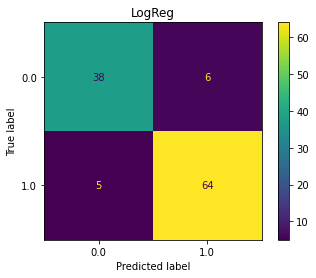

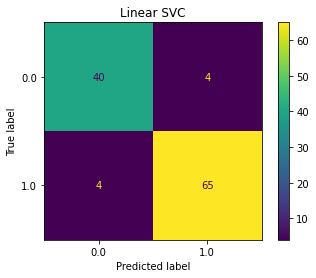

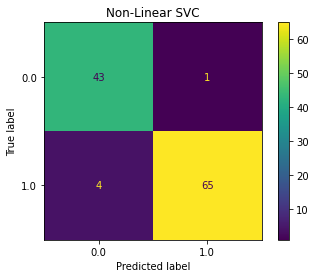

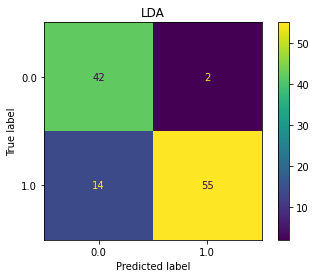

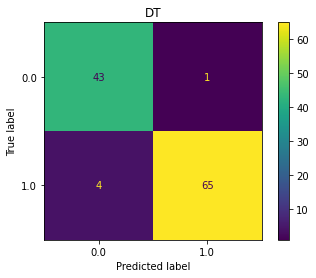

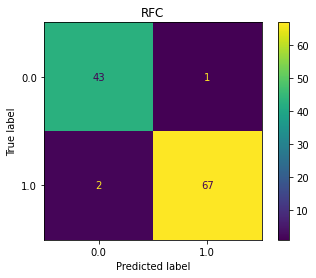

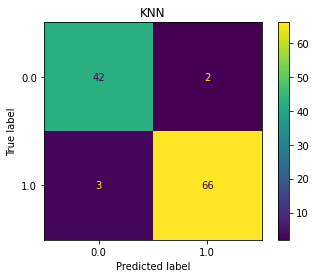

In [10]:
LogReg, LogReg_Scores = model_logreg(x_train, X_Test, Y_train, y_test, flag)
lin_SVM, lin_SVM_Scores = model_lin_svm(x_train, X_Test, Y_train, y_test, flag)
nonlin_SVM, nonlin_SVM_Scores = model_nonlin_svm(x_train, X_Test, Y_train, y_test, flag)
LDA, LDA_Scores = model_LDA(x_train, X_Test, Y_train, y_test, flag)
DT, DT_Scores = model_DT(x_train, X_Test, Y_train, y_test, flag)
RF, RF_Scores = model_RFC(x_train, X_Test, Y_train, y_test, flag)
KNN, KNN_Scores = model_KNN(x_train, X_Test, Y_train, y_test, flag)

b.
Now, we plot a table at the end that compares the different models with different
evaluation metrics.

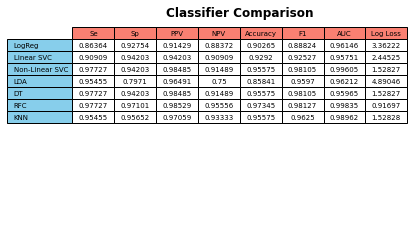

In [11]:
# Plot comparisons in a table
Scores = [LogReg_Scores, lin_SVM_Scores, nonlin_SVM_Scores,
          LDA_Scores, DT_Scores, RF_Scores, KNN_Scores]
Table_Data = pd.DataFrame(Scores, columns=['Se', 'Sp', 'PPV', 'NPV', 'Accuracy',
                          'F1', 'AUC', 'Log Loss'])
Model_Comparison_Table(Table_Data=Table_Data, Title='Classifier Comparison')

We can clearly see that the Random Forest Classifier did the best job in terms of AUC, and
generally performed better in almost all of the metrics than all of the other models.

c.
As we can see from the table, the non-linear models did better than the linear models
on the data, and this is probably because the data was not linearly separable. 

### Part 6

a.

I.
We create a Random Forest Classifier, and use it to find the 2 most important features.
Then, we plot a bar graph that shows the features sorted by importance (from left to right).

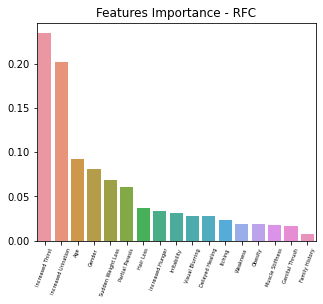

In [12]:
feat = pd.DataFrame(onehot_X.columns)[0]
RFC = RandomForestClassifier(class_weight='balanced_subsample', max_features='log2')
RFC.fit(x_train, Y_train)
RFC_Feature_Selection(feat, RFC)

II.
Yes! We found in the data visualizing section that the features most correlated with
the diagnosis were increased thirst and increased urination, and those findings are
identical here.

### Part 7

a.
Here we perform dimensionality reduction using PCA, and then plot our data in a 2D plot.

In [14]:
# For some reason, in Jupyter Lab this works only after you run it a second time.
pca = PCA(n_components=onehot_X.shape[1], whiten=True)
x_train_PCA = pca.fit_transform(x_train)
X_Test_PCA = pca.transform(X_Test)
X_PCA = X_Test_PCA[:, 0:2]

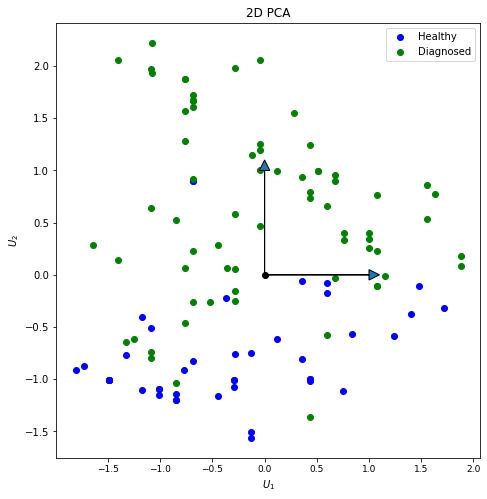

In [15]:
plot_PCA_2D(X_PCA, y_test)

b.
It's not entirely separable by a single line, but there is a clear difference in the
centroids of the two clusters.

c.
Now, we train all of the models on the dimensionality reduced training set, and then
plot the model comparison table.

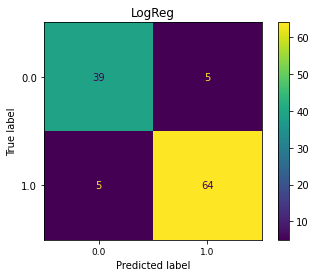

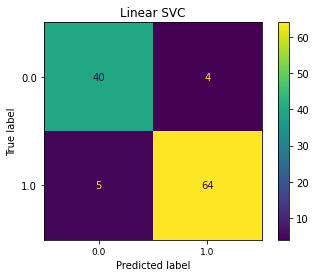

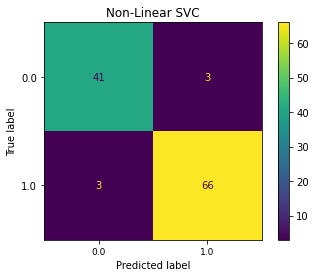

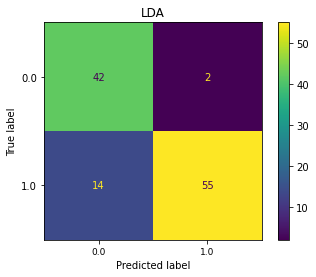

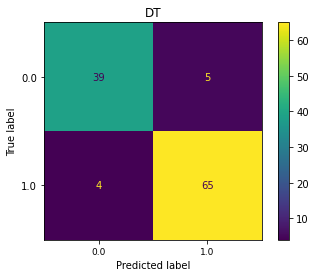

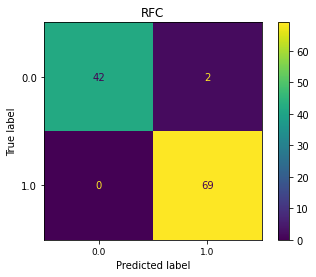

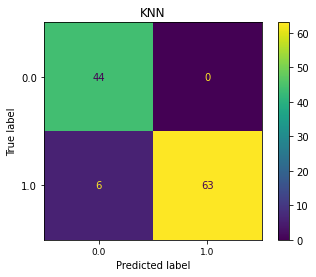

In [16]:
LogReg_PCA, LogReg_Scores_PCA = model_logreg(x_train_PCA, X_Test_PCA, Y_train, y_test, flag)
lin_SVM_PCA, lin_SVM_Scores_PCA = model_lin_svm(x_train_PCA, X_Test_PCA, Y_train, y_test, flag)
nonlin_SVM_PCA, nonlin_SVM_Scores_PCA = model_nonlin_svm(x_train_PCA, X_Test_PCA, Y_train, y_test, flag)
LDA_PCA, LDA_Scores_PCA = model_LDA(x_train_PCA, X_Test_PCA, Y_train, y_test, flag)
DT_PCA, DT_Scores_PCA = model_DT(x_train_PCA, X_Test_PCA, Y_train, y_test, flag)
RF_PCA, RF_Scores_PCA = model_RFC(x_train_PCA, X_Test_PCA, Y_train, y_test, flag)
KNN_PCA, KNN_Scores_PCA = model_KNN(x_train_PCA, X_Test_PCA, Y_train, y_test, flag)

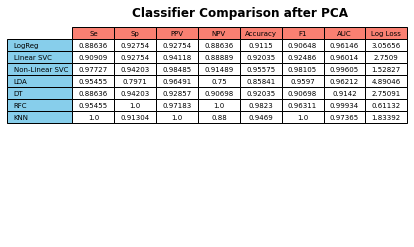

In [17]:
Scores = [LogReg_Scores_PCA, lin_SVM_Scores_PCA, nonlin_SVM_Scores, LDA_Scores_PCA,
              DT_Scores_PCA, RF_Scores_PCA, KNN_Scores_PCA]
Table_Data_PCA = pd.DataFrame(Scores, columns=['Se', 'Sp', 'PPV', 'NPV', 'Accuracy',
                          'F1', 'AUC', 'Log Loss'])
Model_Comparison_Table(Table_Data=Table_Data_PCA, Title='Classifier Comparison after PCA')

d.
Now we train all of the models on the training set with only the 2 most important features
found in section 6 (increased thirst and increased urination), and then plot the model
comparison table.

In [18]:
x_train_2 = pd.concat([x_train['Increased Thirst'], x_train['Increased Urination']], axis=1)
X_Test_2 = pd.concat([X_Test['Increased Thirst'], X_Test['Increased Urination']], axis=1)

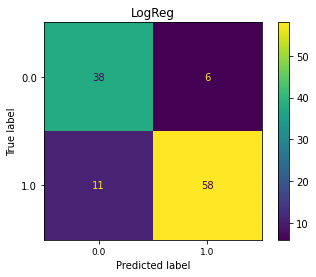

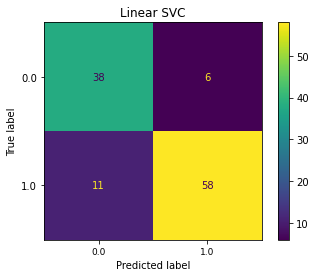

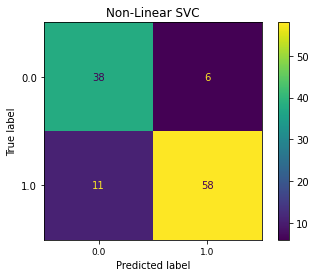

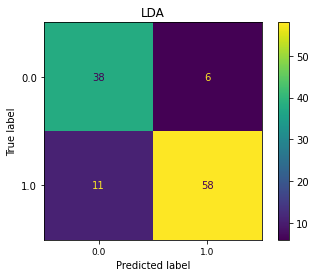

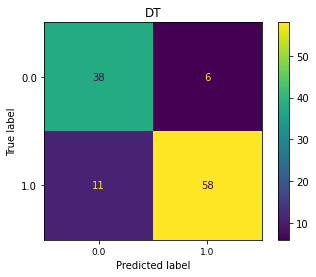

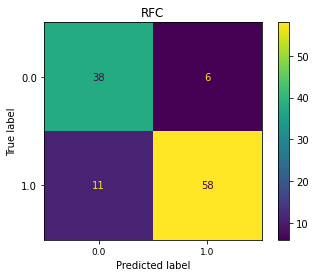

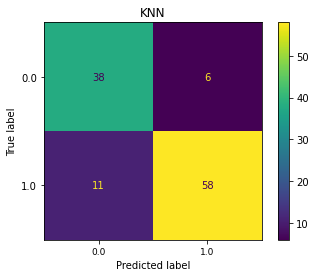

In [19]:
LogReg_2, LogReg_Scores_2 = model_logreg(x_train_2, X_Test_2, Y_train, y_test, flag)
lin_SVM_2, lin_SVM_Scores_2 = model_lin_svm(x_train_2, X_Test_2, Y_train, y_test, flag)
nonlin_SVM_2, nonlin_SVM_Scores_2 = model_nonlin_svm(x_train_2, X_Test_2, Y_train, y_test, flag)
LDA_2, LDA_Scores_2 = model_LDA(x_train_2, X_Test_2, Y_train, y_test, flag)
DT_2, DT_Scores_2 = model_DT(x_train_2, X_Test_2, Y_train, y_test, flag)
RF_2, RF_Scores_2 = model_RFC(x_train_2, X_Test_2, Y_train, y_test, flag)
KNN_2, KNN_Scores_2 = model_KNN(x_train_2, X_Test_2, Y_train, y_test, flag)

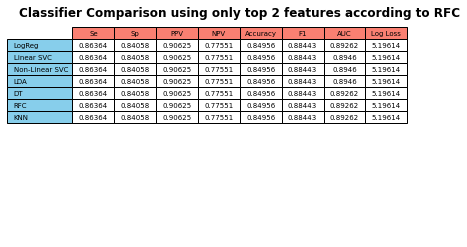

In [20]:
Scores = [LogReg_Scores_2, lin_SVM_Scores_2, nonlin_SVM_Scores_2, LDA_Scores_2,
              DT_Scores_2, RF_Scores_2, KNN_Scores_2]
Table_Data_PCA = pd.DataFrame(Scores, columns=['Se', 'Sp', 'PPV', 'NPV', 'Accuracy',
                          'F1', 'AUC', 'Log Loss'])
Model_Comparison_Table(Table_Data=Table_Data_PCA, Title='Classifier Comparison using only top 2 features according to RFC')

e.
It's easy to see that the dimensionality reduced training set works better, but it's still
pretty astounding that the 2-feature model did pretty good considering we removed 15 out of
17 total features from the training set.
Obviously there is the question of computation time, but for the size of this dataset, both
the dimensionality reduced and the 2-feature training sets were fitted in approximately the
same time, so in this case we would choose the dimensionality reduced training set.